In [1]:
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.backends.backend_pdf import PdfPages
#matplotlib.use('Agg')
matplotlib.rc('font', family='DejaVu Sans', stretch="condensed")

## Edge Analysis

In [2]:
#matplotlib.use('Agg')
matplotlib.rc('font', family='DejaVu Sans', stretch="condensed")

In [3]:
df = pd.read_csv("edge-analysis/results/poligraph-stats.py")

In [4]:
pdf_backend = PdfPages('result-policy.pdf')

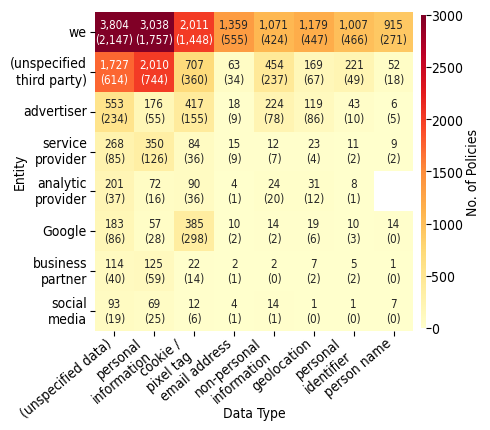

In [5]:
entities_mapping = {
    "we": "we",
    "UNSPECIFIC_ACTOR": "(unspecified\nthird party)",
    "advertiser": "advertiser",
    "service provider": "service\nprovider",
    "analytic provider": "analytic\nprovider",
    "Google": "Google",
    "business partner": "business\npartner",
    "social media": "social\nmedia",
}

dtypes_mapping = {
    "UNSPECIFIC_DATA": "(unspecified data)",
    "personal information": "personal\ninformation",
    "cookie / pixel tag": "cookie /\npixel tag",
    "email address": "email address",
    "non-personal information": "non-personal\ninformation",
    "geolocation": "geolocation",
    "personal identifier": "personal\nidentifier",
    "person name": "person name",
    #"ip address": "ip address",
    #"device identifier": "device\nidentifier",
}

fontsize = 'medium'

tmp_df = df[df.u.isin(entities_mapping) & df.v.isin(dtypes_mapping) & (df.rel == "COLLECT")]
pv_table = pd.pivot_table(tmp_df, values="count", index="u", columns="v")
pv_table = pv_table.loc[entities_mapping.keys(), dtypes_mapping.keys()]
pv_table_purpose = pd.pivot_table(tmp_df, values="purpose_count", index="u", columns="v")
pv_table_purpose = pv_table_purpose.loc[entities_mapping.keys(), dtypes_mapping.keys()]

pv_table.rename(columns=dtypes_mapping, index=entities_mapping, inplace=True)
#pv_table = pv_table.T
pv_table_purpose.rename(columns=dtypes_mapping, index=entities_mapping, inplace=True)
#pv_table_purpose = pv_table_purpose.T

fig = plt.figure(figsize=(5, 6))

labels = pv_table.fillna(0).applymap(lambda x: ("{:,}".format(int(x))))
labels = labels + "\n" + pv_table_purpose.fillna(0).applymap(lambda x: ("({:,})".format(int(x))))

ax = sns.heatmap(pv_table, cmap='YlOrRd', annot=labels, square=True, vmin=0, vmax=3000,
    annot_kws={'size': "small"},
    cbar_kws={'shrink': 0.55, 'aspect': 60, 'pad': 0.02}, fmt="")

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=fontsize, pad=0)
colorbar.ax.set_ylabel('No. of Policies', size=fontsize, labelpad=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=fontsize)

ax.tick_params(axis='x', which='major', pad=0)
ax.tick_params(axis='y', which='major', pad=2)

ax.set_xlabel("Data Type", labelpad=-10)
ax.set_ylabel("Entity", labelpad=-12)
fig.set_tight_layout(True)
#fig.savefig("figs/collect-edge-heatmap.pdf")
pdf_backend.savefig()

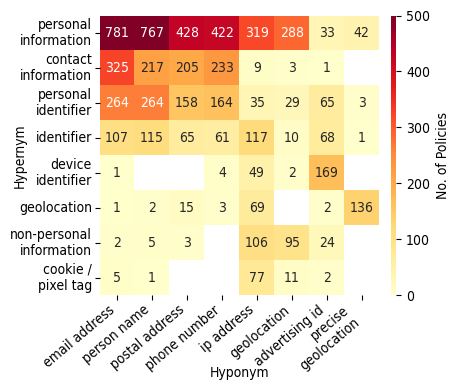

In [6]:
# yq '.links[] | select( .key == "SUBSUM" ) | .source'
upper_mapping = {
    "personal information": "personal\ninformation",
    "contact information": "contact\ninformation",
    "personal identifier": "personal\nidentifier",
    "identifier": "identifier",
    "device identifier": "device\nidentifier",
    "geolocation": "geolocation",
    "non-personal information": "non-personal\ninformation",
    "cookie / pixel tag": "cookie /\npixel tag",
}

# yq '.links[] | select( .key == "SUBSUM" ) | .target'
lower_mapping = {
    "email address": "email address",
    "person name": "person name",
    "postal address": "postal address",
    "phone number": "phone number",
    "ip address": "ip address",
    "geolocation": "geolocation",
    #"date of birth": "date of birth",
    "advertising id": "advertising id",
    "precise geolocation": "precise\ngeolocation",
    #"anonymous identifier": "anonymous\nidentifier",
}

fontsize = 'medium'

tmp_df = df[df.u.isin(upper_mapping) & df.v.isin(lower_mapping) & (df.rel == "SUBSUM")]
pv_table = pd.pivot_table(tmp_df, values="count", index="u", columns="v")
pv_table = pv_table.loc[upper_mapping.keys(), lower_mapping.keys()]
pv_table.rename(columns=lower_mapping, index=upper_mapping, inplace=True)

fig = plt.figure(figsize=(6, 4))
labels = pv_table.fillna(0).applymap(lambda x: ("{:,}".format(int(x))))
ax = sns.heatmap(pv_table, cmap='YlOrRd', annot=labels, square=True, vmin=0, vmax=500,
    annot_kws={'size': "medium"},
    cbar_kws={'shrink': 1.0, 'aspect': 50, 'pad': 0.02}, fmt="")

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.ax.set_ylabel('No. of Policies', size=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=fontsize)

ax.tick_params(axis='both', which='major', pad=2)
ax.set_xlabel("Hyponym", labelpad=-5)
ax.set_ylabel("Hypernym", labelpad=-12)
fig.set_tight_layout(True)
#fig.savefig("figs/subsum-edge-heatmap.pdf")
pdf_backend.savefig()

## Inferences

In [7]:
entity_order = ["advertiser", "analytic provider", "social media", "content provider", "auth provider", "email service provider"]
datatype_order = ["government identifier", "contact information", "software identifier", "hardware identifier", "protected classification",  "biometric information", "geolocation",  "internet activity"]

entity_stats = pd.read_csv("summarization-analysis/results/entity_stats.csv", index_col=0)
#entity_stats.rename(columns={'UNSPECIFIC_ACTOR': '(unspecified third party)'}, index={'UNSPECIFIC_DATA': '(unspecified data)'}, inplace=True)
total_collection = entity_stats["total"]

In [8]:
shorter_data_mapping = {
    'government identifier': 'government id.',
    'contact information': 'contact info.',
    'software identifier': 'software id.',
    'hardware identifier': 'hardware id.',
    'protected classification': 'protected class.',
    'biometric information': 'biometric info.',
}

shorter_entity_mapping = {
    "analytic provider": "analytic\nprovider",
    "content provider": "content\nprovider",
    "email service provider": "email service\nprovider"
}

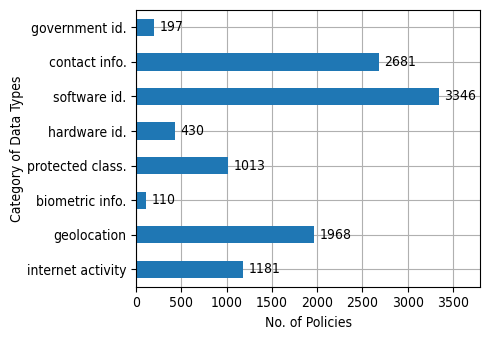

In [9]:
fig = plt.figure(figsize=(5, 3.5))
#ax = total_collection.loc[datatype_order[::-1]].drop("(unspecified data)").plot.barh()
ax = total_collection.loc[datatype_order[::-1]].rename(shorter_data_mapping).plot.barh()
ax.bar_label(ax.containers[0], padding = 4)

ax.set_xlim(0, 3800)
ax.set_axisbelow(True)
ax.grid()
ax.set_xlabel("No. of Policies")
ax.set_ylabel("Category of Data Types", labelpad=2)
fig.set_tight_layout(True)
#fig.savefig("figs/stat_collection.pdf")
pdf_backend.savefig()

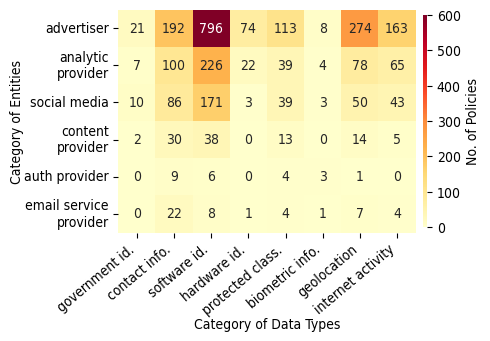

In [10]:
#ext_entity_stats = pd.read_csv("stats/ext_entity_stats.csv", index_col=0)
#ext_entity_stats.rename(columns={'UNSPECIFIC_ACTOR': '(unspecific entity)'}, index={'UNSPECIFIC_DATA': '(unspecific data)'}, inplace=True)
#ext_entity_stats = ext_entity_stats.loc[datatype_order, entity_order]

tmp_df = entity_stats.loc[datatype_order, entity_order].T.copy()
tmp_df.rename(columns=shorter_data_mapping, index=shorter_entity_mapping, inplace=True)
#tmp_df2 = ext_entity_stats.copy()

labels = tmp_df.applymap(lambda x: ("{:,}".format(int(x))))
#labels = labels + "\n" + tmp_df2.applymap(lambda x: ("({:,})".format(int(x))))

fig = plt.figure(figsize=(5, 4.5))
ax = sns.heatmap(tmp_df, cmap='YlOrRd', annot=labels, square=True, annot_kws={'size': "medium"},
                 vmin=0.0, vmax=600,
                 cbar_kws={'shrink': 0.52, 'aspect': 50, 'pad': 0.02}, fmt="")

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.ax.set_ylabel('No. of Policies', size=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=fontsize)

ax.set_ylabel("Category of Entities", labelpad=0)
ax.set_xlabel("Category of Data Types", labelpad=0)
fig.set_tight_layout(True)
#fig.savefig("figs/data-sharing-heatmap.pdf")
pdf_backend.savefig()

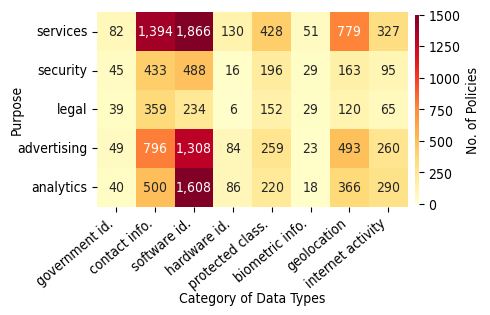

In [11]:
purpose_stats = pd.read_csv("summarization-analysis/results/purpose_stats.csv", index_col=0)
#purpose_stats.rename(columns={'UNSPECIFIC_ACTOR': '(unspecified third party)'}, index={'UNSPECIFIC_DATA': '(unspecified data)'}, inplace=True)
#ext_purpose_stats = pd.read_csv("stats/ext_purpose_stats.csv", index_col=0)
#ext_purpose_stats.rename(columns={'UNSPECIFIC_ACTOR': '(unspecific entity)'}, index={'UNSPECIFIC_DATA': '(unspecific data)'}, inplace=True)

tmp_df = purpose_stats.loc[datatype_order, :].T
tmp_df.rename(columns=shorter_data_mapping, inplace=True)
#tmp_df2 = ext_purpose_stats.loc[datatype_order, :]

labels = tmp_df.applymap(lambda x: ("{:,}".format(int(x))))
#labels = labels + "\n" + tmp_df2.applymap(lambda x: ("({:,})".format(int(x))))

fig = plt.figure(figsize=(5, 4.5))
ax = sns.heatmap(tmp_df, cmap='YlOrRd', annot=labels, square=True, annot_kws={'size': "medium"},
                 vmin=0.0, vmax=1500.0,
                 cbar_kws={'shrink': 0.45, 'aspect': 50, 'pad': 0.02}, fmt="")

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.ax.set_ylabel('No. of Policies', size=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=fontsize)

ax.set_ylabel("Purpose", labelpad=-5)
ax.set_xlabel("Category of Data Types", labelpad=0)
fig.set_tight_layout(True)

#fig.savefig("figs/data-purpose-heatmap.pdf")
pdf_backend.savefig()

In [12]:
pdf_backend.close()